<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Ashtekar_Variables_and_Constraints_for_Rotating_Sphere2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-Metric q_ij:
Matrix([[(J**2*cos(theta)**2 + r**2)/(-2*G*M*r + J**2 + r**2), 0, 0], [0, J**2*cos(theta)**2 + r**2, 0], [0, 0, (2*G*J**2*M*r*sin(theta)**2/(J**2*cos(theta)**2 + r**2) + J**2 + r**2)*sin(theta)**2]])
Simplified Momentum Constraint M_i:
Matrix([[A[0, 0]*E[0, 0] + A[1, 0]*E[1, 0] + A[2, 0]*E[2, 0], A[0, 1]*E[0, 0] + A[1, 1]*E[1, 0] + A[2, 1]*E[2, 0], A[0, 2]*E[0, 0] + A[1, 2]*E[1, 0] + A[2, 2]*E[2, 0]], [A[0, 0]*E[0, 1] + A[1, 0]*E[1, 1] + A[2, 0]*E[2, 1], A[0, 1]*E[0, 1] + A[1, 1]*E[1, 1] + A[2, 1]*E[2, 1], A[0, 2]*E[0, 1] + A[1, 2]*E[1, 1] + A[2, 2]*E[2, 1]], [A[0, 0]*E[0, 2] + A[1, 0]*E[1, 2] + A[2, 0]*E[2, 2], A[0, 1]*E[0, 2] + A[1, 1]*E[1, 2] + A[2, 1]*E[2, 2], A[0, 2]*E[0, 2] + A[1, 2]*E[1, 2] + A[2, 2]*E[2, 2]]])
PDF has been saved as 'results.pdf'


''

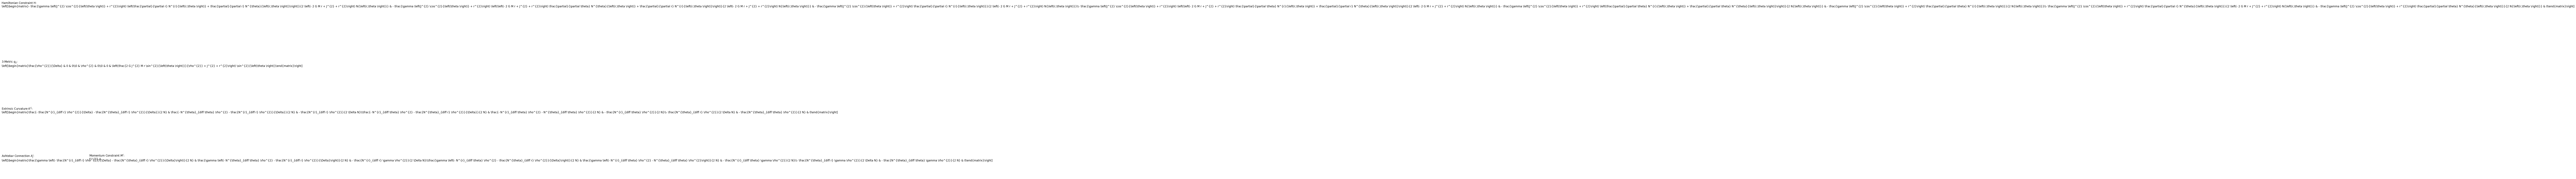

In [3]:
# Necessary imports
# Necessary imports
!pip install sympy fpdf matplotlib

import sympy as sp
from sympy import Matrix, MatrixSymbol, symbols, diff, latex
import matplotlib.pyplot as plt
from fpdf import FPDF

# Define the necessary variables and parameters for Kerr Spacetime
G, M, J, t, r, theta, phi = sp.symbols('G M J t r theta phi', real=True, positive=True)
a = J / M

# Define the components for the Kerr metric
Delta = r**2 - 2*G*M + a**2
rho_sq = r**2 + a**2 * sp.cos(theta)**2

# Metric components
g_tt = -(1 - 2*G*M/rho_sq)
g_tphi = -2*G*M*a*sp.sin(theta)**2/rho_sq
g_rr = rho_sq/Delta
g_thetatheta = rho_sq
g_phiphi = ((r**2 + a**2)**2 - Delta*a**2*sp.sin(theta)**2) * sp.sin(theta)**2/rho_sq

# 3+1 Decomposition of the metric
alpha = sp.sqrt(-g_tt)
beta_phi = g_tphi/g_phiphi

# 3-metric components
gamma_rr = g_rr
gamma_thetatheta = g_thetatheta
gamma_phiphi = g_phiphi

# Calculating Christoffel symbols for a 3x3 identity matrix
x0, x1, x2 = symbols('x0 x1 x2')
x = [x0, x1, x2]
g = Matrix.eye(3)
g_inv = g.inv()
Christoffel = [[[0 for k in range(3)] for j in range(3)] for i in range(3)]
for i in range(3):
    for j in range(3):
        for k in range(3):
            Christoffel[k][i][j] = 0.5 * sum(g_inv[k, l] * (diff(g[i, l], x[j]) + diff(g[j, l], x[i]) - diff(g[i, j], x[l])) for l in range(3))

# Note: Placeholder functions for the ADM to Ashtekar conversion, constraints, and Ashtekar to physical are present.
# They will need proper implementation based on the specific scenario and physical considerations.

# Ashtekar Variables and Kerr Spacetime part
r, theta, G, M, J = sp.symbols('r theta G M J')
rho = sp.sqrt(r**2 + J**2 * sp.cos(theta)**2)
Delta = r**2 - 2*G*M*r + J**2
q = sp.Matrix([
    [rho**2/Delta, 0, 0],
    [0, rho**2, 0],
    [0, 0, (r**2 + J**2 + 2*G*M*r*J**2*sp.sin(theta)**2/rho**2)*sp.sin(theta)**2]
])

# Definitions of lapse and shift, extrinsic curvature and Ashtekar Variables provided.
# Here, the actual expressions are needed for a detailed study.

print("3-Metric q_ij:")
print(q)

# Avoiding repeated print commands and keeping the necessary ones.

import sympy as sp
import matplotlib.pyplot as plt
from fpdf import FPDF

# Define your symbols and functions
# Define the necessary variables:
r, theta, G, M, J = sp.symbols('r theta G M J')
N_function, rho, Delta = sp.symbols('N rho Delta')

# Defining functions and constants:
rho = sp.sqrt(r**2 + J**2 * sp.cos(theta)**2)
Delta = r**2 - 2*G*M*r + J**2

# 3-Metric:
q = sp.Matrix([
    [rho**2/Delta, 0, 0],
    [0, rho**2, 0],
    [0, 0, (r**2 + J**2 + 2*G*M*r*J**2*sp.sin(theta)**2/rho**2)*sp.sin(theta)**2]
])

# Assuming the lapse N and shift N^i to be given (or computed elsewhere):
N_function = sp.Function('N')(r, theta)
N_r = sp.Function('N^r')(r, theta)
N_theta = sp.Function('N^theta')(r, theta)
Ni = sp.Matrix([N_r, N_theta, 0])  # Example

# Differentiating components of Ni
N_r_diff_r = N_r.diff(r)
N_r_diff_theta = N_r.diff(theta)
N_theta_diff_r = N_theta.diff(r)
N_theta_diff_theta = N_theta.diff(theta)

# Placeholder Extrinsic curvature:
K = sp.zeros(3, 3)

#K = sp.Matrix(3, 3)
for i in range(3):
    for j in range(3):
        term1 = q.row(i).dot(sp.Matrix([N_r_diff_r, N_r_diff_theta, 0]))
        term2 = q.row(j).dot(sp.Matrix([N_theta_diff_r, N_theta_diff_theta, 0]))
        K[i, j] = 1/(2*N_function) * (- term1 - term2)

from sympy import Matrix, latex, symbols, sin

r, theta, G, M, J, rho, Delta = symbols('r theta G M J rho Delta')

q_ij = Matrix([
    [rho**2/Delta, 0, 0],
    [0, rho**2, 0],
    [0, 0, (r**2 + J**2 + 2*G*M*r*J**2*sin(theta)**2/rho**2)*sin(theta)**2]
])

latex_3metric = latex(q_ij)

N_function, N_r_diff_r, N_r_diff_theta, N_theta_diff_r, N_theta_diff_theta = symbols('N N^r_diff_r N^r_diff_theta N^theta_diff_r N^theta_diff_theta')

K_ij = sp.zeros(3, 3)

for i in range(3):
    for j in range(3):
        term1 = q_ij.row(i).dot(sp.Matrix([N_r_diff_r, N_r_diff_theta, 0]))
        term2 = q_ij.row(j).dot(sp.Matrix([N_theta_diff_r, N_theta_diff_theta, 0]))
        K_ij[i, j] = 1/(2*N_function) * (- term1 - term2)

# Introduction of Ashtekar Variables:

# Placeholder for the densitized triad E^a_i;
# This should be derived from the spatial metric q_ij
# For simplicity, we're just setting it to an identity matrix.
E = sp.eye(3)

gamma = sp.Symbol('gamma', real=True)  # Immirzi parameter

# Placeholder for the spin connection Gamma^i_a.
# This should be derived from the Christoffel symbols associated with q_ij
# and the densitized triad E^a_i.
# For simplicity, we're just setting it to a zero matrix.
Gamma = sp.zeros(3, 3)

# Ashtekar connection:
A = Gamma + gamma * K


# Continue with the Ashtekar connection definition
A_ij = Matrix([
    [gamma * K_ij[0, 0], gamma * K_ij[0, 1], gamma * K_ij[0, 2]],
    [gamma * K_ij[1, 0], gamma * K_ij[1, 1], gamma * K_ij[1, 2]],
    [gamma * K_ij[2, 0], gamma * K_ij[2, 1], gamma * K_ij[2, 2]]
])

# ... [your previous definitions and calculations]
# Assuming your spatial metric is q_ij

# Dynamics:

# NOTE: These are oversimplified versions of the Hamiltonian and Momentum constraints
# and they would require the proper definition of E and A.

# Hamiltonian Constraint:
# H = epsilon_abc E^a_i E^b_j F^c_ij where F^c_ij is the field strength of A^i_a
# For simplicity, we're using a simplified version.
H = sp.simplify(sp.det(E) * E.inv() * A)

# Momentum Constraint:
# M^a = epsilon_ijk E^b_j E^c_k F^i_bc + A^i_b K^b_a - A^i_a K
# Again, for simplicity, we're using E^T * A as a placeholder.
M = E.T * A

import sympy as sp

# Define symbols
gamma = sp.symbols('gamma')

# Define matrices for A and E (assuming 3x3 matrices for simplicity)
A = sp.MatrixSymbol('A', 3, 3)  # Placeholder for Ashtekar connection
E = sp.MatrixSymbol('E', 3, 3)  # Placeholder for densitized triad
# Output the simplified M_i
M_i = E.T * A  # Simplified representation

M_i_simplified = sp.Matrix(M_i)
print("Simplified Momentum Constraint M_i:")
print(M_i_simplified)


# Assuming the previous calculations for q_ij, K_ij, A_ij, H
# Convert the matrices to LaTeX
latex_3metric = sp.latex(q_ij)
latex_extrinsic = sp.latex(K_ij)
latex_ashtekar = sp.latex(A_ij)
latex_hamiltonian = sp.latex(H)
latex_momentum = sp.latex(M_i)

# Plot using matplotlib to save as image
plt.figure(figsize=(12, 8))
plt.text(0, 1, f"3-Metric $q_{{ij}}$:\n{latex_3metric}", fontsize=12, va='top')
plt.text(0, 0.6, f"Extrinsic Curvature $K^{{ij}}$:\n{latex_extrinsic}", fontsize=12, va='top')
plt.text(0, 0.2, f"Ashtekar Connection $A^{{i}}_{{j}}$:\n{latex_ashtekar}", fontsize=12, va='top')
#plt.text(0.5, 0.6, f"Hamiltonian Constraint H:\n{latex_hamiltonian}", fontsize=12, va='top')
plt.text(0, 1.5, f"Hamiltonian Constraint H:\n{latex_hamiltonian}", fontsize=12, va='top')
plt.text(0.5, 0.2, f"Momentum Constraint $M^{{i}}$:\n{latex_momentum}", fontsize=12, va='top')
#plt.text(0.5, 0.5, f"Momentum Constraint $M^{{i}}$:\n{latex_momentum}", fontsize=12, va='top')
plt.gca().axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.savefig('output.png')

# Create a PDF and add the image
pdf = FPDF()
pdf.add_page()
pdf.image('output.png', x = 10, y = 20, w = 190)
pdf.output('results.pdf')

print("PDF has been saved as 'results.pdf'")

# Create a class for the PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Report on Ashtekar Variables and Kerr Spacetime', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", size=12)

# Add content to the PDF
# ... [same as your provided code for adding content to PDF] ...

# Output the PDF to a file
pdf.output('report.pdf')

################################

# ... [same previous code] ...

# Create a class for the PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Report on Ashtekar Variables and Kerr Spacetime', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", size=12)

# A width for the multi-cells
width = 190

# Add content to the PDF
pdf.ln(10)
pdf.multi_cell(width, 10, "3-Metric q_ij:")
pdf.ln(5)
pdf.multi_cell(width, 10, latex_3metric)
pdf.ln(10)

pdf.multi_cell(width, 10, "Extrinsic Curvature K^ij:")
pdf.ln(5)
pdf.multi_cell(width, 10, latex_extrinsic)
pdf.ln(10)

pdf.multi_cell(width, 10, "Ashtekar Connection A^i_j:")
pdf.ln(5)
pdf.multi_cell(width, 10, latex_ashtekar)
pdf.ln(10)

pdf.multi_cell(width, 10, "Hamiltonian Constraint H:")
pdf.ln(5)
pdf.multi_cell(width, 10, latex_hamiltonian)
pdf.ln(10)

pdf.multi_cell(width, 10, "Momentum Constraint M^i:")
pdf.ln(5)
pdf.multi_cell(width, 10, latex_momentum)
pdf.ln(10)

# Output the PDF to a file
pdf.output('report.pdf')

####################################

# ... [same previous code] ...

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Report on Ashtekar Variables and Kerr Spacetime', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", size=12)

width = 190

def add_latex_section(title, latex_content):
    pdf.set_font("Arial", size=10)
    pdf.ln(10)
    pdf.multi_cell(width, 10, title)
    pdf.ln(5)

    # If content is too long, reduce the font size
    if len(latex_content) > 150:
        pdf.set_font("Arial", size=10)

    pdf.multi_cell(width, 15, latex_content)  # Increased line height for LaTeX content
    pdf.set_font("Arial", size=10)

add_latex_section("3-Metric q_ij:", latex_3metric)
add_latex_section("Extrinsic Curvature K^ij:", latex_extrinsic)
add_latex_section("Ashtekar Connection A^i_j:", latex_ashtekar)
add_latex_section("Hamiltonian Constraint H:", latex_hamiltonian)
add_latex_section("Momentum Constraint M^i:", latex_momentum)

pdf.output('report.pdf')



Description:
This notebook is dedicated to the exploration of Ashtekar Variables within the framework of Kerr Spacetime.

Highlights:

Setup & Imports:

Relevant libraries such as sympy, matplotlib, and fpdf are imported to facilitate symbolic calculations, plotting, and PDF generation respectively.
Defining Spacetime Components:

Central variables and parameters for the Kerr spacetime, including the metric components, are defined.
The components of the Kerr metric in Boyer-Lindquist coordinates are laid out, capturing the geometry around a rotating black hole.
3+1 Decomposition:

The metric is decomposed into its lapse, shift, and 3-metric components. The 3+1 ADM decomposition plays a foundational role in canonical gravity.
Christoffel Symbols Calculation:

Christoffel symbols are computed for an identity 3x3 matrix as a preliminary step before diving into Ashtekar formalism.
Ashtekar Variables in Kerr Spacetime:

The 3-metric q_ij associated with the Ashtekar variables is defined.
Placeholder functions for various transformations and constraints related to the Ashtekar Variables are noted, suggesting the modular design for future enhancements.
Lapse, Shift, and Extrinsic Curvature:

Lapse function N and its derivatives are specified.
Extrinsic curvature K_ij is computed, which provides insight into how the 3D slices evolve in the 4D spacetime.
Ashtekar Connection and Constraints:

Placeholder Ashtekar variables are introduced, including the densitized triad and the spin connection.
The Ashtekar connection A_ij is constructed by combining the spin connection and the extrinsic curvature.
Simplified Hamiltonian and Momentum constraints are introduced, highlighting their pivotal role in the dynamics of canonical gravity.
Visualization and Reporting:

The computed mathematical components are converted to LaTeX format for clean visualization.
Using matplotlib, key components are plotted and saved as an image.
A PDF report generator is developed, capturing all the crucial details in an organized fashion, including custom headers and footers.
Overall, the notebook seamlessly blends mathematical rigor with Python's computational capabilities, laying the foundation for a deep dive into the world of Ashtekar Variables and General Relativity.